In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def source1(no_of_users)->np.ndarray:
    rnd_seed=19
    # np.random.seed(rnd_seed)
    return np.random.uniform(-1, 1, (no_of_users))
    # return np.array([0.1, 0.1, 0.1, 0.1, 0.1])

Changed bi

In [93]:
plotting=0
comments=0

no_of_sources=5
no_of_slots=2
threshold_prob=0.9999
threshold_prob_range= np.linspace(0.1, 0.99,100)
snr=14
snr_range=np.arange(0,snr+1)
available_power=0.5
slots_range=np.arange(1,no_of_slots+1)

iterations=2

In [94]:
def pre_process1(msg: np.ndarray, cha_coeff: np.ndarray,alpha:float) -> np.ndarray:
    b = alpha / cha_coeff  # Standard preprocessing
    # b=1
    return msg * b



In [95]:
def awgn_mac_with_channel_coeff(symbols, snr_db,channel_coeff)->np.ndarray:
    
    faded_symbols=symbols*channel_coeff# This corresponds to y = x_i * h_i
    
    if(comments):
        print("\t\txb=",symbols)
        print("\t\th=",channel_coeff)
        print("\t\txbh=",faded_symbols,np.sum(faded_symbols))
        pass
    
    combined_faded_symbols = np.sum(faded_symbols)# This corresponds to y = ∑x_i * h_i
    signal_power = np.abs(combined_faded_symbols)**2  # Signal power calculation
    snr_linear = 10**(snr_db / 10.0)
    noise_variance = signal_power / (snr_linear)
    noise =np.sqrt(noise_variance) * np.random.randn()# Noise generation
    # noise=0
    
    if(comments):
        print("\t\t∑xbh=",combined_faded_symbols)
        print("\t\tn=",noise)
        pass
    print("\t\tn=",noise)
    return faded_symbols,combined_faded_symbols + noise

changed bi

In [96]:
def demod(received_signal,cha_coeff,power:float,alpha)->np.ndarray:
    if(comments):
        print("\t\tr'=",received_signal)
        pass
    b=np.minimum(alpha /(cha_coeff),np.sqrt(power)/(alpha))
    a_opt=( np.sum(b*cha_coeff) )   /  ( (np.sum((b*cha_coeff)**2)) + (1) )
    # a_opt=1
    return received_signal*a_opt

input parmaeters

In [97]:
mse = []
for snr in snr_range: 
    alpha=np.sqrt( 2* np.log(  (1/ (1-(1-threshold_prob )**(1/no_of_slots))  )  ) )
    alpha=alpha/ np.sqrt(available_power) 
    print("snr::",snr)
    if(comments):   
        print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
        print("parameter::",snr,"power",available_power,"channel threshold",alpha)
        pass
    
    error=[]
    for j in range(iterations):
        source_main=source1(no_of_sources)
        if(comments):
            print(" iter ",j+1,100*"*")
            print("main source:",source_main,source_main.sum())
        
        source=source_main.copy()
        
        recovered_appending=np.array([])
        for i in slots_range:
            if(i<no_of_slots):
                print(f"\tslot {i}")
                if(comments):
                    print(f"\tslot {i}")
                    pass
                channel_coeff=np.random.randn(len(source))
                eligible_msgs=source[np.abs(channel_coeff)>alpha] 
                if(comments):
                    print(f"\t\tx={eligible_msgs}")
                    pass

                if(plotting):
                    # Plot the main messages with labels
                    plt.figure(figsize=(4,3))
                    plt.plot(np.arange(len(eligible_msgs)), eligible_msgs, "o", markersize=14, label="Main Messages", color="blue")
                    plt.title(f"messges for everys slot (Iteration {j+1}, SNR={snr} ,slot={i})")
                    plt.xlabel("Message Index")
                    plt.ylabel("Message Value")
                    plt.ylim(-1,1)
                    plt.grid(True)
                    pass

                non_transmitted=source[np.abs(channel_coeff)<=alpha]  

                channel_gains=channel_coeff[np.abs(channel_coeff)>alpha]                

                transmitted=pre_process1(eligible_msgs,channel_gains,alpha)

                if(plotting):
                    # Plot pre-processed messages from the current slot on the combined plot
                    # Adjust the x-index to match the length of the transmitted vector
                    x_axis = np.arange(len(transmitted))
                    plt.plot(x_axis, transmitted, "o", markersize=12)
                    plt.ylim(-1,1)
                    # plt.legend()
                    pass

                faded_sym,received= awgn_mac_with_channel_coeff(transmitted, snr,channel_gains)
                if(plotting):
                    plt.plot( faded_sym, "h", markersize=10)
                    plt.ylim(-1,1)
                    pass   
                
                recovered_signal=demod(received,channel_gains,available_power,alpha)

                recovered_appending=np.append(recovered_appending,recovered_signal)
                
                if(comments):
                    print("\t\tr=",recovered_signal)
                    # print("\t\t---------------------------------------------")
                    pass
                source=non_transmitted
            

            if i==no_of_slots:
                print(f"\tslot {i}")
                if(comments):
                    print(f"\tslot {i}")
                    print(f"\t\tx={non_transmitted}")
                    pass
                
                channel_gains=np.random.randn(len(non_transmitted))

                if(plotting):
                    plt.figure(figsize=(4,3))
                    plt.plot(np.arange(len(non_transmitted)), non_transmitted, "o", markersize=14, label="Main Messages", color="blue")
                    plt.title(f"messges for everys slot (Iteration {j+1}, SNR={snr},slot={i})")
                    plt.xlabel("Message Index")
                    plt.ylabel("Message Value")
                    plt.ylim(-1,1)
                    # plt.legend()
                    plt.grid(True)
                    pass
                                
                transmitted=pre_process1(non_transmitted,channel_gains,alpha)
                if(plotting):
                    # Plot pre-processed messages from the current slot on the combined plot
                    # Adjust the x-index to match the length of the transmitted vector
                    x_axis = np.arange(len(transmitted))
                    plt.plot(x_axis, transmitted, "o", markersize=12)
                    plt.ylim(-1,1)
                    # plt.legend()
                    pass
                
                faded_sym,received= awgn_mac_with_channel_coeff(transmitted, snr,channel_gains)
                
                if(plotting):
                    # Plot pre-processed messages from the current slot on the combined plot
                    # Adjust the x-index to match the length of the transmitted vector
                    x_axis = np.arange(len(transmitted))
                    plt.plot(x_axis, faded_sym, "h", markersize=10)
                    plt.ylim(-1,1)
                    # plt.legend()
                    pass
                

                recovered_signal=demod(received,channel_gains,available_power,alpha)
                recovered_appending=np.append(recovered_appending,recovered_signal)

                if(comments):
                    print("\t\tr=",recovered_signal)
                    print("\t\t---------------------------------------------")
                    pass
        # print("\t\t______________________________________________________________________")
        error.append(np.mean((source_main.sum() - recovered_appending.sum()) ** 2))
        if(comments):
            print("\t\t\tsource sum",source_main.sum())
            print("\t\t\trecovered",recovered_appending.sum())
            print("\t\t\terror",error)
            pass
    mse.append(np.mean(error))
    # print("mse",mse)

snr:: 0
	slot 1
		n= -0.077644804664943
	slot 2
		n= 0.0
	slot 1
		n= 0.006817943371745448
	slot 2
		n= 0.03596894103590222
snr:: 1
	slot 1
		n= -0.014748784824697965
	slot 2
		n= -0.0
	slot 1
		n= -0.22415832379124143
	slot 2
		n= -0.0
snr:: 2
	slot 1
		n= -0.006673871292029557
	slot 2
		n= 0.0
	slot 1
		n= -0.022833937567888297
	slot 2
		n= -0.0
snr:: 3
	slot 1
		n= -0.02265710786129033
	slot 2
		n= 0.1147056429837925
	slot 1
		n= -0.4860392251863691
	slot 2
		n= -0.0
snr:: 4
	slot 1
		n= 0.0005610664433353732
	slot 2
		n= -0.0
	slot 1
		n= -0.05017763727768407
	slot 2
		n= 0.0
snr:: 5
	slot 1
		n= -0.06865257721518271
	slot 2
		n= -0.0
	slot 1
		n= 0.20066465848590825
	slot 2
		n= 0.2605735119854611
snr:: 6
	slot 1
		n= 0.08844568673223281
	slot 2
		n= -0.010435575602711899
	slot 1
		n= -0.02663106839225972
	slot 2
		n= 0.013865861678718994
snr:: 7
	slot 1
		n= 0.12559263386037167
	slot 2
		n= 0.0026930645015619125
	slot 1
		n= 0.0587193095021578
	slot 2
		n= -0.0
snr:: 8
	slot 1
		

In [98]:
print("\nSNR:",snr_range)
print("MSE:",mse)


SNR: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
MSE: [0.13112875286780173, 0.5695568123288123, 0.046074466415553864, 3.0405456873439056, 0.931346781716997, 3.5385088826027484, 0.4235465422536727, 3.7988818730083413, 0.1441806377333748, 1.9010195446569118, 1.2396431668599028, 2.9574876033759567, 0.031801115232196954, 0.8175316723839654, 0.07542132320174895]


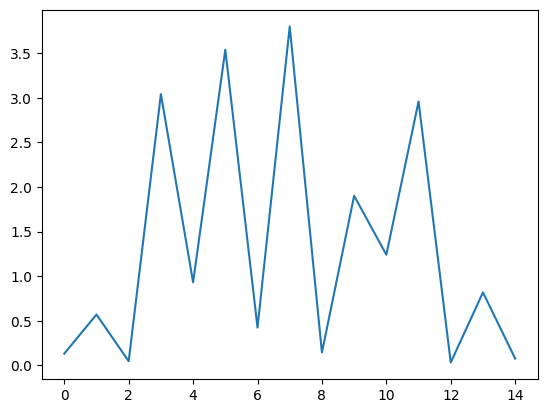

In [99]:
plt.plot(snr_range,mse)
plt.show()